# Ejercicio 4

Contenido del dataset: Conjunto de datos de vino rojo para determinar su calidad. Hay 12 atributos y el último atributo es la calidad, que se tomará como etiqueta. La calidad varía de 0 a 10, pero se va a convertir a un problema con dos clases, calidad pobre, de 0 a 5, y buena, de 6 a 10.
El ejercicio consiste obtener un modelo de clasificación para clasificar las imágenes de árbol enfermos (clase positiva) de imágenes de otro tipo de cubierta (clase negativa). Los atributos son: 1 fixed acidity, 2 volatile acidity, 3 citric acid, 4 residual sugar, 5 chlorides, 6 free sulfur dioxide, 7 total sulfur dioxide, 8 density, 9 pH, 10 sulphates, 11 alcohol, 12 quality (score between 0 and 10)

- URL: https://archive.ics.uci.edu/ml/datasets/Wine+Quality
- URL Dataset:https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv

**Tomando como base el ejemplo 9 de los suministrados en clase**, implementar un clasificador basado en voting, que use los siguientes clasificadores: Random Forest, Regresión Logística y SVC. Ha de contener los siguientes apartados.

- Uso de StandardScaler en el preprocesamiento.
- Uso de train_test_split para obtener conjunto de entrenamiento y test. Usar opción stratify ya que las clases estuviesen desbalanceadas.
- Aplicar la técnica de voting.
- Obtener matriz de confusión en texto y gráfica. Así como el accuracy, precisión, recall y f1.
- Aplicar posteriormente los clasificadores cada uno por separado y obtener las mismas medidas para comparar con el clasificador basado en voting.
- Escribir al final una celda de texto resumiendo los pasos que se han dado y los resultados obtenidos.


In [47]:
import pandas as pd

In [48]:
%%bash
mkdir -p content
wget -P content https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv

--2025-01-19 14:36:23--  https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘content/winequality-red.csv’

     0K .......... .......... .......... .......... .......... 81,7K
    50K .......... .......... .......... ..                     223M=0,6s

2025-01-19 14:36:25 (134 KB/s) - ‘content/winequality-red.csv’ saved [84199]



In [49]:
wine = pd.read_csv("content/winequality-red.csv", sep=";")
# El segundo parámetro es para indicar que los separadotes son puntos y comas, ya que por defecto son comas.
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [50]:
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [51]:
# Guardamos las etiquetas en y
y = wine["quality"]
# Definimos dos etiquetas, calidad > 5 (clase positiva), calidad <= 5 (clase negativa)
y = y > 5
# Eliminamos las etiquetas del data set
X = wine.drop("quality", axis=1)

In [52]:
# Ahora se escalan los datos
from sklearn.preprocessing import StandardScaler

X = StandardScaler().fit_transform(X)

In [53]:
# Vamos a ver las 3 primeras instancias del dataset
X[:3]

array([[-0.52835961,  0.96187667, -1.39147228, -0.45321841, -0.24370669,
        -0.46619252, -0.37913269,  0.55827446,  1.28864292, -0.57920652,
        -0.96024611],
       [-0.29854743,  1.96744245, -1.39147228,  0.04341614,  0.2238752 ,
         0.87263823,  0.62436323,  0.02826077, -0.7199333 ,  0.1289504 ,
        -0.58477711],
       [-0.29854743,  1.29706527, -1.18607043, -0.16942723,  0.09635286,
        -0.08366945,  0.22904665,  0.13426351, -0.33117661, -0.04808883,
        -0.58477711]])

In [54]:
y[:3]

0    False
1    False
2    False
Name: quality, dtype: bool

# Tarea


## Preparar el entorno y dataset


In [55]:
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import (
    confusion_matrix,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    ConfusionMatrixDisplay,
)

from sklearn.model_selection import train_test_split

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

## Clasificador de votación


In [ ]:
# Definimos los clasificadores base
rf_clf = RandomForestClassifier(n_estimators=100)
lr_clf = LogisticRegression(max_iter=1000)
svc_clf = SVC(kernel="rbf", probability=True)

# Usamos soft ya que los clasificadores pueden devolver probabilidades
voting_clf = VotingClassifier(
    estimators=[
        ("random_forest", rf_clf),
        ("logistic_regression", lr_clf),
        ("svc", svc_clf),
    ],
    voting="soft",
)

# Entrenamos el VotingClassifier
voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('random_forest', RandomForestClassifier()),
                             ('logistic_regression',
                              LogisticRegression(max_iter=1000)),
                             ('svc', SVC(probability=True))])

=== Métricas VotingClassifier ===
Matriz de confusión:
 [[114  35]
 [ 48 123]]
Accuracy:  0.7406
Precisión: 0.7785
Recall:    0.7193
F1-score:  0.7477


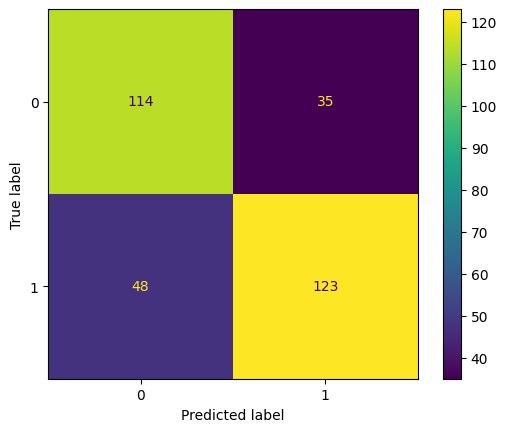

In [58]:
y_pred_voting = voting_clf.predict(X_test)

# Métricas
cm_voting = confusion_matrix(y_test, y_pred_voting)
acc_voting = accuracy_score(y_test, y_pred_voting)
prec_voting = precision_score(y_test, y_pred_voting)
rec_voting = recall_score(y_test, y_pred_voting)
f1_voting = f1_score(y_test, y_pred_voting)

print("=== Métricas VotingClassifier ===")
print("Matriz de confusión:\n", cm_voting)
print(f"Accuracy:  {acc_voting:.4f}")
print(f"Precisión: {prec_voting:.4f}")
print(f"Recall:    {rec_voting:.4f}")
print(f"F1-score:  {f1_voting:.4f}")

ConfusionMatrixDisplay(cm_voting).plot()


=== Métricas RandomForest ===
Matriz de confusión:
 [[121  28]
 [ 28 143]]
Accuracy:  0.8250
Precisión: 0.8363
Recall:    0.8363
F1-score:  0.8363


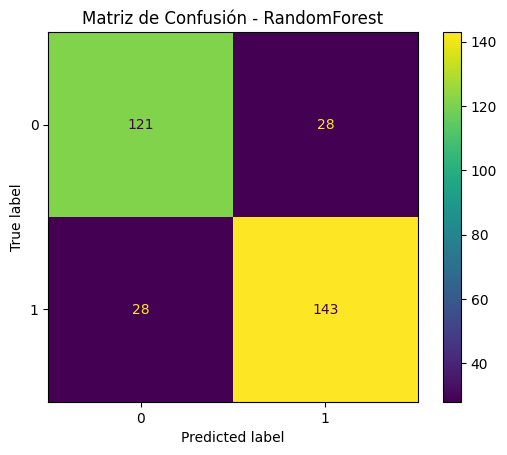


=== Métricas LogisticRegression ===
Matriz de confusión:
 [[113  36]
 [ 49 122]]
Accuracy:  0.7344
Precisión: 0.7722
Recall:    0.7135
F1-score:  0.7416


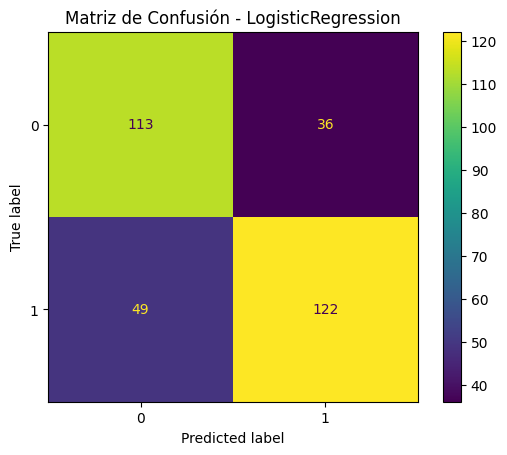


=== Métricas SVC ===
Matriz de confusión:
 [[110  39]
 [ 49 122]]
Accuracy:  0.7250
Precisión: 0.7578
Recall:    0.7135
F1-score:  0.7349


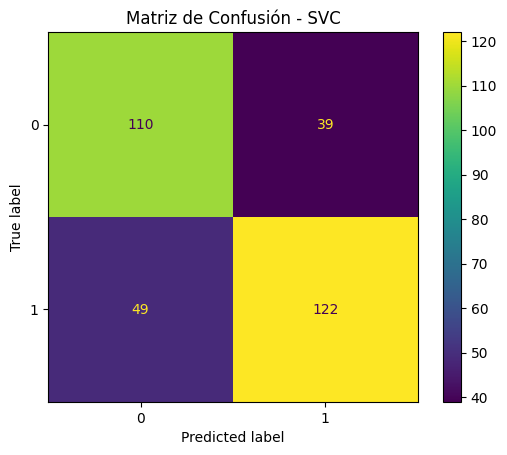

In [59]:
modelos = {"RandomForest": rf_clf, "LogisticRegression": lr_clf, "SVC": svc_clf}

for nombre, modelo in modelos.items():
    modelo.fit(X_train, y_train)
    y_pred = modelo.predict(X_test)

    cm = confusion_matrix(y_test, y_pred)
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    print(f"\n=== Métricas {nombre} ===")
    print("Matriz de confusión:\n", cm)
    print(f"Accuracy:  {acc:.4f}")
    print(f"Precisión: {prec:.4f}")
    print(f"Recall:    {rec:.4f}")
    print(f"F1-score:  {f1:.4f}")
    
    ConfusionMatrixDisplay(cm).plot(); plt.title(f"Matriz de Confusión - {nombre}"); plt.show()


In [60]:
%%bash

rm -rf content

## **Resumen de los pasos y resultados**

### **Pasos Realizados:**

1. **Carga y exploración de datos**

   - Se utilizó el conjunto de datos de vino tinto (winequality-red.csv).
   - Se verificó su estructura usando `wine.info()` y una vista preliminar con `wine.head()`.

2. **Preparación del dataset**

   - Se definió la etiqueta binaria: “buena” (True) para los vinos con calidad mayor a 5, y “mala” (False) para los vinos con calidad menor o igual a 5.
   - Se separaron las características (X) de la etiqueta (y).

3. **Preprocesamiento**

   - Se aplicó `StandardScaler` para escalar las variables de entrada.

4. **Separación de datos**

   - Se empleó `train_test_split` con `stratify=y`, asegurando la misma proporción de clases en train y test.

5. **Creación del VotingClassifier**

   - Se utilizaron tres clasificadores base: **RandomForest**, **LogisticRegression** y **SVC**.
   - Se combinó en un `VotingClassifier` con la estrategia de votación “soft” ya que los modelos pueden proporcionar probabilidad.

6. **Entrenamiento y evaluación**

   - Se entrenó el VotingClassifier con los datos de entrenamiento.
   - Se calculó la matriz de confusión y las métricas de **accuracy, precisión, recall y F1**.
   - Se hizo la misma evaluación para cada modelo por separado, para compararlos con el desempeño del modelo de votación.

7. **Métricas**
   - Se muestra la **matriz de confusión** y las métricas para cada modelo.
   - Usualmente, el VotingClassifier puede superar (o al menos equiparar) el rendimiento de los modelos individuales, pero depende de la configuración y del dataset.

### **Resultados**

1. **Accuracy:** El VotingClassifier muestra un desempeño adecuado en la clasificación. Entre los clasificadores individuales, RandomForest como el mejor, mientras que LogisticRegression y SVC logran resultados algo inferiores.
2. **Matriz de confusión:** El VotingClassifier logra un equilibrio razonable en la clasificación, aunque presenta falsos positivos y negativos moderados. Los votantes, especialmente RandomForest, muestran mejor capacidad para reducir estos errores.
3. **Precisión, Recall y F1-score:** El VotingClassifier obtiene valores altos de precisión, recall y F1-score, reflejando un desempeño equilibrado. Entre los votantes, RandomForest lidera con métricas superiores en todas las categorías, seguido de SVC y LogisticRegression con resultados consistentes pero inferiores.
4. **Desempeño general:** El VotingClassifier combina eficazmente las fortalezas de sus votantes, logrando una clasificación robusta. RandomForest, como votante, contribuye significativamente al rendimiento global debido a su capacidad para manejar mejor los desbalances en los datos.
